**Primeiro bloco**

Obtendo e salvando os dados da API em um arquivo csv.

In [28]:
#  importanto a biblioteca requests como r, para facilitar na hora 
#  de chamar os comandos:
import requests as r

#  agora, criando uma variável para a url da API que será utilizada
#  para acessar esses dados sobre a covid-19:
url = 'https://api.covid19api.com/dayone/country/brazil'

#  fazendo a requisição e guardando em uma variável de resposta o que
#  ela precisa fazer:
resp = r.get(url)  #chamando a biblioteca .get

#  esta API utiliza json como método de transmissão de dados.
#  os dados obtidos serão armazenados na seguinte variável:
raw_data = resp.json()  
raw_data[0]

#  A API retorna uma lista com cada um dos jsons representando
#  um dia diferente e os relatórios com os números para aquele dia,
#  começando no dia do 1º caso confirmado até o dia da requisição 
#  (data de hoje).

#  entre os dados fornecidos por essa API, vou trabalhar com
#  números de: casos confirmados, mortes, recuperados e casos 
#  ativos, de acordo com o dia do registro.

#  para filtrar esses dados, foi criada a seguinte variável:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

#  o próximo passo é os dados em um arquivo csv
#  criando o header (título) do arquivo csv na 1ª posição:
final_data.insert(0, ['confirmados', 'óbitos', 'ativos', 'data'])

#  como nos dados obtidos, além da data consta o timezone do país, 
#  que não será útil, é necessário retirar essa informação
#  para isso, basta filtrar a string, selecionando apenas os
#  dez primeiros caracteres

#  para conseguir referenciar as posições na lista de maneira mais intuitiva,
#  criei essas variáveis:
confirmados = 0
obitos = 1
recuperados = 2
ativos = 3
data = 4

#  sobrescrevendo algumas das informações em final_data:
for i in range(1, len(final_data)):
    final_data[i][data] = final_data[i][data][:10]  #  seleciona apenas os 
                                                    #  10 primeiros caracteres

#  será necessário utilizar a biblioteca datetime para transformar 
#  as strings em um formato data de verdade:
import datetime as dt

#  importanto a biblioteca csv para gravar as informações em um arquivo csv:
import csv 

#  criando um arquivo csv e transferindo os dados para o mesmo :
with open ('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)  
    writer.writerows(final_data)

#  transformando as strings em um objeto datetime:
for i in range(1,len(final_data)):
    final_data[i][data] = dt.datetime.strptime(final_data[i][data], '%Y-%m-%d')


**Segundo bloco**

Criando *helpers* para auxiliar a construção do código.

In [29]:
#  criando algumas funções para auxiliar na interação com o QuickChart

#  a função get_dataset() será responsável pela chave dataset da API QuickChart
#  que constrói os dados do eixo y do gráfico
def get_dataset(y, labels):

    #  verifica se o primeiro valor contido em y é um tipo lista ou um valor comum:
    if type(y[0]) == list:

        #  em caso verdadeiro, inicializa a variável datasets (uma lista contendo
        #  os valores de y e o label respectivo de cada um deles):
        datasets = []
        for i in range(len(y)):

            #  cria um dicionário 'label' contendo a lista de labels na posição atual e
            #  a chave 'data' que contém y na posição atual
            datasets.append({
                'label': labels[i],
                'data': y[i]  
            })
        return datasets

    #  caso o primeiro valor contido em y não seja lista, retorna uma lista 
    #  de um único valor de dicionário - um label que idealmente é aquela 
    #  lista de labels na posição[0], e os dados são os próprios valores de y
    else:
        return [ 
          {
              'label': labels[0],
              'data': y
          }
        ]

#  o próximo helper é o título do gráfico, que recebe como valor padrão uma string
#  vazia, para caso não seja inserido um valor para o título:
def set_title(title=''):
    if title != '':
        display = 'true'
    else: 
        display = 'false'
    return {
        'title': title,
        'display': display
    }


#  a função que criará os gráficos:
def create_chart(x, y, labels, kind='bar', title=''):
    #  variável datasets que recebe a função get_dataset:
    datasets = get_dataset(y, labels)
    #  variável options que define o título e outros itens referentes à API:
    options = set_title(title)

    #  dicionário que representa o gráfico, com as chaves 'type', 'data' e 'datasets':
    #  (conforme requisitos da aplicação descritos na sua documentação)
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options 
    }
    return chart


def get_api_chart(chart):
    # chamando a API para gerar a imagem do gráfico:
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f"{url_base}?c={str(chart)}")
    return resp.content  # aqui, não se utiliza json, pois está recebendo um valor binário

#  função que recebe como parâmetros 'path'(caminho para salvar a imagem) e
#  'content' (conteúdo do arquivo):
def save_image(path, content):
    with open(path, 'wb') as image:  #  'wb' em vez de 'w' porque é necessário
                                     #  informar que se trata de um arquivo binário
        image.write(content)

#  função que demonstra a imagem aqui no notebook:
from PIL import Image
from IPython.display import display

def display_image(path):
    #  variável img_pil recebe o retorno da função 'save_image'
    img_pil = Image.open(path)  #utiliza a função 'open' da biblioteca PIL('Image')
    display(img_pil)


**Terceiro bloco**

Criando dados e gerando o gráfico do projeto - um plot de barras em grupos mostrando a evolução do número de casos confirmados e o número de casos recuperados desse dataset que vem da API. Assim, serão dois dados diferentes para o eixo y; um para o número de recuperados e outro para o número de casos confirmados.



In [ ]:
#  para melhorar a visualização do gráfico, seleciona-se apenas os dados
#  de intervalos de 10 em 10 dias:
y_data_1 = []
for obs in final_data[1::10]:  #  pula de 10 em 10 dias usando a função slice
    y_data_1.append(obs[confirmados])

y_data_2 = []
for obs in final_data[1::10]:
    y_data_2.append(obs[recuperados])

labels = ['Confirmados', 'Recuperados']

x = []
for  obs in final_data[1::10]:
    x.append(obs[data].strftime('%d/%m/%Y'))  #  a função strftime converte um dado tipo data
    #  em uma string, formatando o texto de acordo com o formato de escrita de data desejado
    #  (neste caso, o formato dia/mês/ano)


chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico-png', chart_content)
display_image('meu-primeiro-grafico.png')


**Resultado**


Abaixo, o código completo e o resultado com a imagem contendo o gráfico gerado com os dados obtidos.

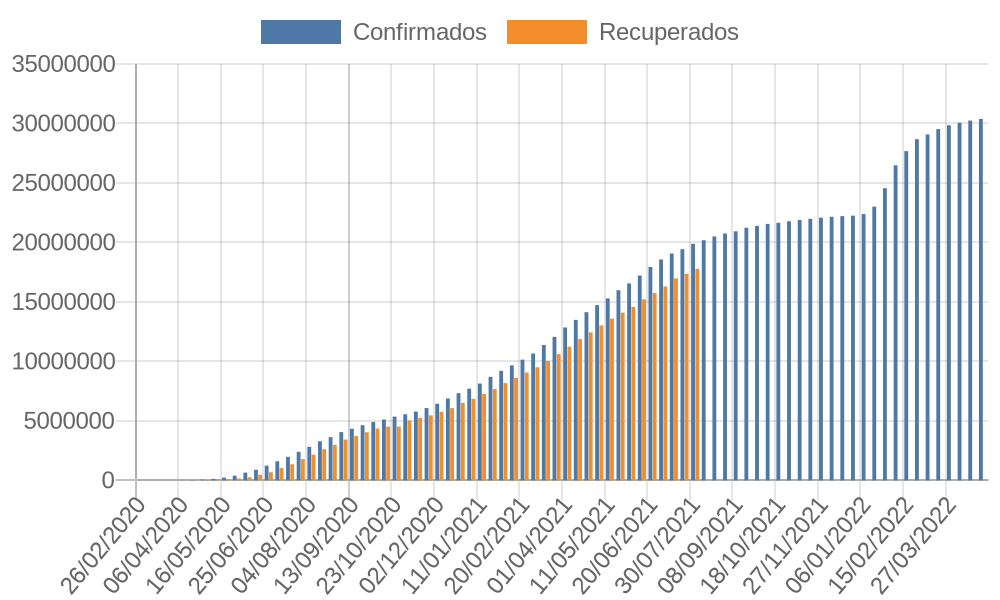

In [35]:
#  importanto a biblioteca requests como r, para facilitar na hora 
#  de chamar os comandos:
import requests as r

#  agora, criando uma variável para a url da API que será utilizada
#  para acessar esses dados sobre a covid-19:
url = 'https://api.covid19api.com/dayone/country/brazil'

#  fazendo a requisição e guardando em uma variável de resposta o que
#  ela precisa fazer:
resp = r.get(url)  #chamando a biblioteca .get

#  esta API utiliza json como método de transmissão de dados.
#  os dados obtidos serão armazenados na seguinte variável:
raw_data = resp.json()  
raw_data[0]

#  A API retorna uma lista com cada um dos jsons representando
#  um dia diferente e os relatórios com os números para aquele dia,
#  começando no dia do 1º caso confirmado até o dia da requisição 
#  (data de hoje).

#  entre os dados fornecidos por essa API, vou trabalhar com
#  números de: casos confirmados, mortes, recuperados e casos 
#  ativos, de acordo com o dia do registro.

#  para filtrar esses dados, foi criada a seguinte variável:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

#  o próximo passo é os dados em um arquivo csv
#  criando o header (título) do arquivo csv na 1ª posição:
final_data.insert(0, ['confirmados', 'óbitos', 'ativos', 'data'])

#  como nos dados obtidos, além da data consta o timezone do país, 
#  que não será útil, é necessário retirar essa informação
#  para isso, basta filtrar a string, selecionando apenas os
#  dez primeiros caracteres

#  para conseguir referenciar as posições na lista de maneira mais intuitiva,
#  criei essas variáveis:
confirmados = 0
obitos = 1
recuperados = 2
ativos = 3
data = 4

#  sobrescrevendo algumas das informações em final_data:
for i in range(1, len(final_data)):
    final_data[i][data] = final_data[i][data][:10]  #  seleciona apenas os 
                                                    #  10 primeiros caracteres

#  será necessário utilizar a biblioteca datetime para transformar 
#  as strings em um formato data de verdade:
import datetime as dt

#  importanto a biblioteca csv para gravar as informações em um arquivo csv:
import csv 

#  criando um arquivo csv e transferindo os dados para o mesmo :
with open ('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)  
    writer.writerows(final_data)

#  transformando as strings em um objeto datetime:
for i in range(1,len(final_data)):
    final_data[i][data] = dt.datetime.strptime(final_data[i][data], '%Y-%m-%d')

#  criando algumas funções para auxiliar na interação com o QuickChart

#  a função get_dataset() será responsável pela chave dataset da API QuickChart
#  que constrói os dados do eixo y do gráfico
def get_dataset(y, labels):

    #  verifica se o primeiro valor contido em y é um tipo lista ou um valor comum:
    if type(y[0]) == list:

        #  em caso verdadeiro, inicializa a variável datasets (uma lista contendo
        #  os valores de y e o label respectivo de cada um deles):
        datasets = []
        for i in range(len(y)):

            #  cria um dicionário 'label' contendo a lista de labels na posição atual e
            #  a chave 'data' que contém y na posição atual
            datasets.append({
                'label': labels[i],
                'data': y[i]  
            })
        return datasets

    #  caso o primeiro valor contido em y não seja lista, retorna uma lista 
    #  de um único valor de dicionário - um label que idealmente é aquela 
    #  lista de labels na posição[0], e os dados são os próprios valores de y
    else:
        return [ 
          {
              'label': labels[0],
              'data': y
          }
        ]

#  o próximo helper é o título do gráfico, que recebe como valor padrão uma string
#  vazia, para caso não seja inserido um valor para o título:
def set_title(title=''):
    if title != '':
        display = 'true'
    else: 
        display = 'false'
    return {
        'title': title,
        'display': display
    }


#  a função que criará os gráficos:
def create_chart(x, y, labels, kind='bar', title=''):
    #  variável datasets que recebe a função get_dataset:
    datasets = get_dataset(y, labels)
    #  variável options que define o título e outros itens referentes à API:
    options = set_title(title)

    #  dicionário que representa o gráfico, com as chaves 'type', 'data' e 'datasets':
    #  (conforme requisitos da aplicação descritos na sua documentação)
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options 
    }
    return chart


def get_api_chart(chart):
    # chamando a API para gerar a imagem do gráfico:
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f"{url_base}?c={str(chart)}")
    return resp.content  # aqui, não se utiliza json, pois está recebendo um valor binário

#  função que recebe como parâmetros 'path'(caminho para salvar a imagem) e
#  'content' (conteúdo do arquivo):
def save_image(path, content):
    with open(path, 'wb') as image:  #  'wb' em vez de 'w' porque é necessário
                                     #  informar que se trata de um arquivo binário
        image.write(content)

#  função que demonstra a imagem aqui no notebook:
from PIL import Image
from IPython.display import display

def display_image(path):
    #  variável img_pil recebe o retorno da função 'save_image'
    img_pil = Image.open(path)  # utiliza a função 'open' da biblioteca PIL('Image')
    display(img_pil)

#  para melhorar a visualização do gráfico, seleciona-se apenas os dados
#  de intervalos de 10 em 10 dias:
y_data_1 = []
for obs in final_data[1::10]:  #  pula de 10 em 10 dias usando a função slice
    y_data_1.append(obs[confirmados])

y_data_2 = []
for obs in final_data[1::10]:
    y_data_2.append(obs[recuperados])

labels = ['Confirmados', 'Recuperados']

x = []
for  obs in final_data[1::10]:
    x.append(obs[data].strftime('%d/%m/%Y'))  #  a função strftime converte um dado tipo data
    #  em uma string, formatando o texto de acordo com o formato de escrita de data desejado
    #  (neste caso, o formato dia/mês/ano)


chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

